## Analyse scored data

In [200]:
# import
import json
import numpy as np
import pandas as pd
from datetime import datetime
from util import filters
from util.filters import FORMAT, LIKERT_CONVERTER, CONDITIONS

from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
# COMPLETED CHAT
COMPLETED_CHAT = [
    '0a805070',
    '0ca07eae',
    '1fedce0b',
    '25f91beb',
    '29d1fbab',
    '31ef1437',
    '3f0efa64',
    '4eec345c',
    '64ce8de6',
    '8b49d5c9',
    '8b9d5c77',
    'a29c7903',
    'b9bcb505',
    'c0da7f90',
    'c69eb698',
    'cf1d00f8',
    'cf44525f',
    'e551aa0d',
    'ede3330d',
    'f9c3adbb',
    '07e067f1',
    '1752b88d',
    '1d592874',
    '376a5899',
    '384677e6',
    '42f81d8b',
    '4766e928',
    '565d92b0',
    '5d9b81e0',
    '65beeb52',
    '68e019b0',
    '8f3d4494',
    'a5963840',
    'a955ec8d',
    'cbfc7b97',
    'de6a4316',
    '037ef383',
    '118d9807',
    '16a33519',
    '2e83a5c0',
    '31024d4f',
    '4cfd407b',
    '63900a6d',
    '68c38a81',
    '6b624cca',
    '6cc11957',
    '72ac16a0',
    '976467b3',
    '991508b7',
    'b58ac506',
    'bf6f2bf9',
    'cb2aec8c',
    'cd395f65',
    'e8749e69',
    'e87b34a5',
    '03b019f5',
    '1d3c5ef8',
    '1de97d07',
    '20e2e41a',
    '302ad47c',
    '4a9770ff',
    '5722ca70',
    '750d7a0e',
    '98f259f1',
    'aee66a6d',
    'b849f449',
    'bb00a8a0',
    'bcde45cb',
    'cbcb5e82',
    'd611a8d0',
    'd79f7e95',
    'dc335686',
    'f56852a3'
]

In [202]:
df1 = pd.read_csv("scored_data_v2.csv")
df2 = pd.read_csv("scored_data_v4.csv")
df = pd.concat([df1, df2])

In [203]:
len(df)

98

In [204]:
file = "pilot_09_10_final.json"
with open("./prolific_logs/" + file) as f:
    logs = json.load(f)
logs = [logs["logs"][l] for l in logs["logs"]]
# only consider completed sessions
print("Before filtering")
print("all logs:", len(logs))
for c in CONDITIONS:
    print(c, len([l for l in logs if l["condition"] == c]))

logs = [l for l in logs if l["completedSurvey"] == True]

file = "pilot_09_10_final.json"
with open("./prolific_logs/" + file) as f:
    logs = json.load(f)
logs = [logs["logs"][l] for l in logs["logs"]]
# only consider completed sessions
print("Before filtering")
print("all logs:", len(logs))
for c in CONDITIONS:
    print(c, len([l for l in logs if l["condition"] == c]))

# NOTE: Filter sequence  | ADJUST AS DESIRED
print("n logs before filter:", len(logs))
for c in CONDITIONS:
    print(c, len([l for l in logs if l["condition"] == c]))

logs = [l for l in logs if filters.got_subject_right(l)]
logs = [l for l in logs if filters.got_device_right(l)]
logs = [l for l in logs if filters.got_valid_degree(l)]
logs = [l for l in logs if filters.did_not_cheat(l)]
logs = [l for l in logs if filters.no_tab_switch_during_exam(l)]

print("\nn logs after filter:", len(logs))
for c in CONDITIONS:
    print(c, len([l for l in logs if l["condition"] == c]))

#logs = [l for l in logs if completed_chat(l)]
rel_uuids = [l["uuid"][:8] for l in logs if l["uuid"][:8] in df["uuid"].values]
rel_uuids = list(set(rel_uuids))

print("\nAfter filtering")
print("completed logs:", len(logs))
for c in CONDITIONS:
    print(c, len([l for l in logs if l["condition"] == c]))

Before filtering
all logs: 166
reading 41
teacher-qa-bot 42
llm-qa-bot 41
llm-chatbot 42
Before filtering
all logs: 166
reading 41
teacher-qa-bot 42
llm-qa-bot 41
llm-chatbot 42
n logs before filter: 166
reading 41
teacher-qa-bot 42
llm-qa-bot 41
llm-chatbot 42

n logs after filter: 54
reading 11
teacher-qa-bot 14
llm-qa-bot 10
llm-chatbot 19

After filtering
completed logs: 54
reading 11
teacher-qa-bot 14
llm-qa-bot 10
llm-chatbot 19


In [205]:
df = df[df["uuid"].isin(rel_uuids)]
df.shape

(53, 14)

In [206]:
# compare for individual questions
for i in range(1, 7):
    lists = []
    print("Question", i)
    for c in CONDITIONS:
        sub_df = df[df["condition"] == c]
        #sub_df = pd.concat([sub_df, sub_df])
        lists.append(sub_df["score_" + str(i)].values)
        print(c, str(round(np.mean(sub_df["score_" + str(i)].values),2)) + " ± " +  str(round(np.std(sub_df["score_" + str(i)].values),2)))

    _, p_value = f_oneway(*lists)
    print("ANOVA p-value:", round(p_value, 3))
    print("")

Question 1
reading 1.0 ± 0.74
teacher-qa-bot 1.38 ± 0.84
llm-qa-bot 1.3 ± 0.64
llm-chatbot 1.47 ± 0.68
ANOVA p-value: 0.421

Question 2
reading 0.55 ± 0.89
teacher-qa-bot 0.92 ± 1.0
llm-qa-bot 0.3 ± 0.64
llm-chatbot 0.79 ± 0.77
ANOVA p-value: 0.332

Question 3
reading 0.55 ± 0.78
teacher-qa-bot 1.31 ± 0.91
llm-qa-bot 0.8 ± 0.75
llm-chatbot 0.95 ± 0.83
ANOVA p-value: 0.189

Question 4
reading 0.73 ± 0.75
teacher-qa-bot 0.85 ± 0.53
llm-qa-bot 0.7 ± 0.9
llm-chatbot 0.89 ± 0.91
ANOVA p-value: 0.917

Question 5
reading 0.18 ± 0.39
teacher-qa-bot 0.38 ± 0.74
llm-qa-bot 0.2 ± 0.4
llm-chatbot 0.16 ± 0.49
ANOVA p-value: 0.692

Question 6
reading 0.45 ± 0.66
teacher-qa-bot 0.92 ± 0.62
llm-qa-bot 0.7 ± 0.64
llm-chatbot 0.89 ± 0.79
ANOVA p-value: 0.352



In [207]:
# compare for fill-in-the-blank questions
copy_df = df.copy()
#copy_df = pd.concat([copy_df, copy_df])
print("fill blank score, n =", len(copy_df))
copy_df["aggregated"] = copy_df["score_1"].values + copy_df["score_2"].values + copy_df["score_3"].values
lists = []
for c in CONDITIONS:
    sub_df = copy_df[copy_df["condition"] == c]
    lists.append(sub_df["aggregated"].values)
    print(c, str(round(np.mean(sub_df["aggregated"].values),2)) + " ± " + str(round(np.std(sub_df["aggregated"].values),2)))

_, p_value = f_oneway(*lists)
print("ANOVA p-value:", round(p_value, 3))
print("")
print("Broferroni correction")
for i in range(len(lists)):
    for j in range(i + 1, len(lists)):
        _, p_value = f_oneway(lists[i], lists[j])
        print(CONDITIONS[i] + " vs " + CONDITIONS[j] + " p-value:", round(p_value, 3))

print("")
print("One-sided T")
for j in range(len(lists) - 1):
    _, p_value = stats.ttest_ind(lists[3],  lists[j], equal_var=False, alternative="greater")
    print(CONDITIONS[i] + " vs " + CONDITIONS[j] + " p-value:", round(p_value, 3))

fill blank score, n = 53
reading 2.09 ± 2.15
teacher-qa-bot 3.62 ± 2.13
llm-qa-bot 2.4 ± 1.56
llm-chatbot 3.21 ± 1.76
ANOVA p-value: 0.218

Broferroni correction
reading vs teacher-qa-bot p-value: 0.11
reading vs llm-qa-bot p-value: 0.726
reading vs llm-chatbot p-value: 0.147
teacher-qa-bot vs llm-qa-bot p-value: 0.162
teacher-qa-bot vs llm-chatbot p-value: 0.575
llm-qa-bot vs llm-chatbot p-value: 0.249

One-sided T
llm-chatbot vs reading p-value: 0.089
llm-chatbot vs teacher-qa-bot p-value: 0.704
llm-chatbot vs llm-qa-bot p-value: 0.119


In [208]:
# compare for open ended
copy_df = df.copy()
#copy_df = pd.concat([copy_df, copy_df])
print("open ended, n =", len(copy_df))
copy_df["aggregated"] = copy_df["score_4"].values + copy_df["score_5"].values + copy_df["score_6"].values
lists = []
for c in CONDITIONS:
    sub_df = copy_df[copy_df["condition"] == c]
    lists.append(sub_df["aggregated"].values)
    print(c, str(round(np.mean(sub_df["aggregated"].values),2)) + " ± " + str(round(np.std(sub_df["aggregated"].values),2)))
_, p_value = f_oneway(*lists)
print("ANOVA p-value:", round(p_value, 3))
print("")
print("Broferroni correction")
for i in range(len(lists)):
    for j in range(i + 1, len(lists)):
        _, p_value = f_oneway(lists[i], lists[j])
        print(CONDITIONS[i] + " vs " + CONDITIONS[j] + " p-value:", round(p_value, 3))

print("")
print("One-sided T")
for j in range(len(lists) - 1):
    _, p_value = stats.ttest_ind(lists[3],  lists[j], equal_var=False, alternative="greater")
    print(CONDITIONS[i] + " vs " + CONDITIONS[j] + " p-value:", round(p_value, 3))

open ended, n = 53
reading 1.36 ± 1.61
teacher-qa-bot 2.15 ± 1.35
llm-qa-bot 1.6 ± 1.2
llm-chatbot 1.95 ± 1.5
ANOVA p-value: 0.572

Broferroni correction
reading vs teacher-qa-bot p-value: 0.224
reading vs llm-qa-bot p-value: 0.723
reading vs llm-chatbot p-value: 0.343
teacher-qa-bot vs llm-qa-bot p-value: 0.339
teacher-qa-bot vs llm-chatbot p-value: 0.703
llm-qa-bot vs llm-chatbot p-value: 0.547

One-sided T
llm-chatbot vs reading p-value: 0.179
llm-chatbot vs teacher-qa-bot p-value: 0.651
llm-chatbot vs llm-qa-bot p-value: 0.261


In [209]:
# compare for all
copy_df = df.copy()
#copy_df = pd.concat([copy_df, copy_df])
print("total score, n =", len(copy_df))
copy_df["aggregated"] = copy_df["score_1"].values + copy_df["score_2"].values + copy_df["score_3"].values + copy_df["score_4"].values + copy_df["score_6"].values
lists = []
for c in CONDITIONS:
    sub_df = copy_df[copy_df["condition"] == c]
    lists.append(sub_df["aggregated"].values)
    print(c, str(round(np.mean(sub_df["aggregated"].values),2)) + " ± " + str(round(np.std(sub_df["aggregated"].values),2)))
_, p_value = f_oneway(*lists)
print("ANOVA p-value:", round(p_value, 3))
print("")
print("Broferroni correction")
for i in range(len(lists)):
    for j in range(i + 1, len(lists)):
        _, p_value = f_oneway(lists[i], lists[j])
        print(CONDITIONS[i] + " vs " + CONDITIONS[j] + " p-value:", round(p_value, 3))

print("")
print("One-sided T")
for j in range(len(lists) - 1):
    _, p_value = stats.ttest_ind(lists[3],  lists[j], equal_var=False, alternative="greater")
    print(CONDITIONS[i] + " vs " + CONDITIONS[j] + " p-value:", round(p_value, 3))

total score, n = 53
reading 3.27 ± 3.11
teacher-qa-bot 5.38 ± 2.53
llm-qa-bot 3.8 ± 2.32
llm-chatbot 5.0 ± 2.92
ANOVA p-value: 0.235

Broferroni correction
reading vs teacher-qa-bot p-value: 0.093
reading vs llm-qa-bot p-value: 0.682
reading vs llm-chatbot p-value: 0.152
teacher-qa-bot vs llm-qa-bot p-value: 0.155
teacher-qa-bot vs llm-chatbot p-value: 0.711
llm-qa-bot vs llm-chatbot p-value: 0.287

One-sided T
llm-chatbot vs reading p-value: 0.083
llm-chatbot vs teacher-qa-bot p-value: 0.648
llm-chatbot vs llm-qa-bot p-value: 0.129


# TODO: ANALYZE PASTE BEHAVIOR

In [210]:
# WRITE A FUNCTION THAT SHOWS WHAT EACH USER TRIED TO PASTE HERE
for log in logs:
    if log["condition"] == "reading":
        continue
    entries = log["chatLog"]["current"]
    if "paste" in entries:
        print(len(entries["paste"]), entries["paste"])

2 [{'date': '9/10/2023, 10:03:23 PM', 'text': 'hese subunits are made up of proteins and RNA '}, {'date': '9/10/2023, 10:03:25 PM', 'text': 'hese subunits are made up of proteins and RNA '}]
2 [{'date': '9/10/2023, 3:53:11 PM', 'text': 'Peroxisomes are small, round organelles enclosed by single membranes. They carry out oxidation reactions that break down fatty acids and amino acids. They also detoxify many poisons that may enter the body.'}, {'date': '9/10/2023, 3:53:12 PM', 'text': 'Peroxisomes are small, round organelles enclosed by single membranes. They carry out oxidation reactions that break down fatty acids and amino acids. They also detoxify many poisons that may enter the body.'}]
5 [{'date': '9/10/2023, 5:12:45 PM', 'text': 'The phrase "form follows function" in cell biology means that the structure of cell components and organelles is directly related to their function'}, {'date': '9/10/2023, 5:12:47 PM', 'text': 'The phrase "form follows function" in cell biology means tha

### Visualize user interaction trajectories

In [211]:
# helper functions
AGG_DF = df.copy()
AGG_DF["aggregated"] = copy_df["score_1"].values + copy_df["score_2"].values + copy_df["score_3"].values + copy_df["score_4"].values + copy_df["score_5"].values + copy_df["score_6"].values

def get_learn_time(log):
    time_enter = datetime.strptime(log["timestamps"]["enterMain"], FORMAT)
    time_exit = datetime.strptime(log["timestamps"]["enterKnowledge"], FORMAT)
    return (time_exit - time_enter).total_seconds() / 60

def get_scroll_times(log):
    time_enter = datetime.strptime(log["timestamps"]["enterMain"], FORMAT)
    stimes = []
    for t in log["scrollLogs"]:
        stimes.append((datetime.strptime(t["time"], FORMAT) - time_enter).total_seconds())
    stimes = list(set(stimes))
    stimes.sort()
    return [t / 60 for t in stimes]

def get_chat_times(log):
    # MOST LIKELY WE ONLY CARE ABOUT USER AND HELP -- STUDENT ALWAYS AFTER USER
    time_enter = datetime.strptime(log["timestamps"]["enterMain"], FORMAT)
    chats = {"user": [], "student": [], "professor": [], "help": []}
    if log["condition"] == "reading":
        return chats
    entries = log["chatLog"]["current"]

    # process help logs
    if "help" in entries:
        times = [e["date"] for e in entries["help"]]
        times = [datetime.strptime(t, FORMAT) for t in times]
        times = [((t - time_enter).total_seconds() / 60) for t in times]
        chats["help"] = times

    # process professor logs
    if "supervisor" in entries:
        times = [e["date"] for e in entries["supervisor"][1:]]
        times = [datetime.strptime(t, FORMAT) for t in times]
        times = [((t - time_enter).total_seconds() / 60) for t in times]
        chats["supervisor"] = times

    # process user and help logs
    entries = entries["main"]
    if log["condition"] == "llm-chatbot":
        entries = entries[2:]
    if "qa-bot" in log["condition"]:
        entries = entries[1:]

    # process user and student messages
    student_times, user_times = [], []
    for e in entries:
        if ("isUser" in e) and e["isUser"]:
            user_times.append(datetime.strptime(e["date"], FORMAT))
        elif ("isUser" in e) and not e["isUser"]:
            student_times.append(datetime.strptime(e["date"], FORMAT))
        elif ("type" in e) and (e["type"] == "student"):
            student_times.append(datetime.strptime(e["date"], FORMAT))
        else:
            assert False
    chats["user"] = [((t - time_enter).total_seconds() / 60) for t in user_times]
    chats["student"] = [((t - time_enter).total_seconds() / 60) for t in student_times]
    return chats

def prepare_title(log):
    # here: condition + uuid + final aggregated score
    cond = log["condition"]
    uuid = log["uuid"][:8]
    score = AGG_DF[AGG_DF["uuid"] == uuid]["aggregated"].values
    # assert len(score) == 1, "assume only one aggregated score for the score"
    if len(score) == 0:
        return False
    score = score[0]
    title = cond + ": " + str(("user: " + uuid, "score: " + str(score)))
    return title


CONDITION: reading


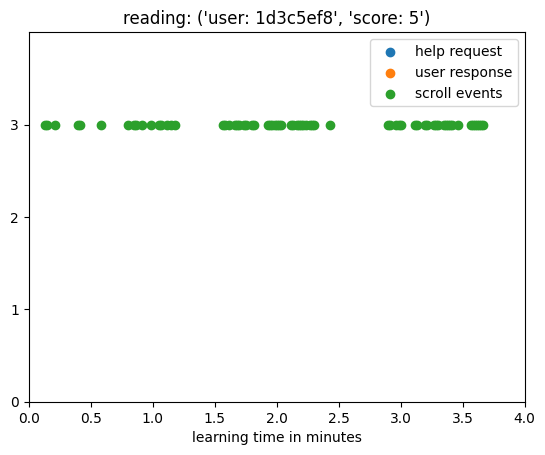

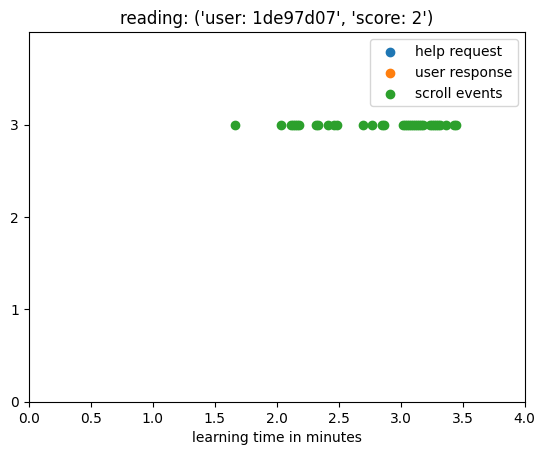

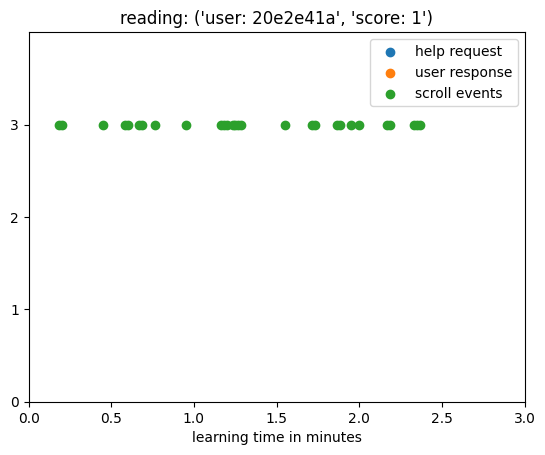

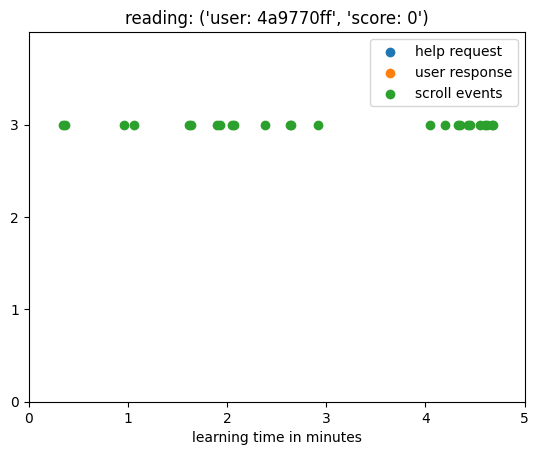

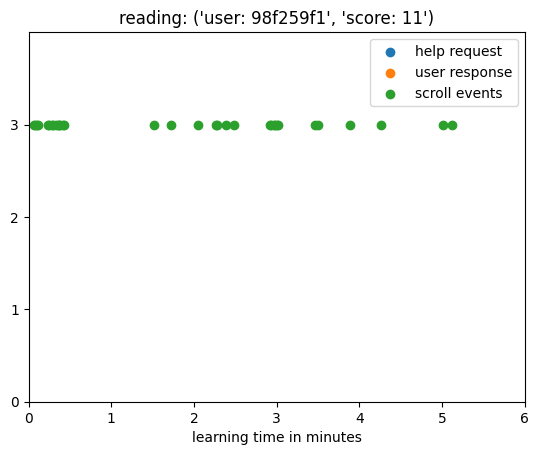

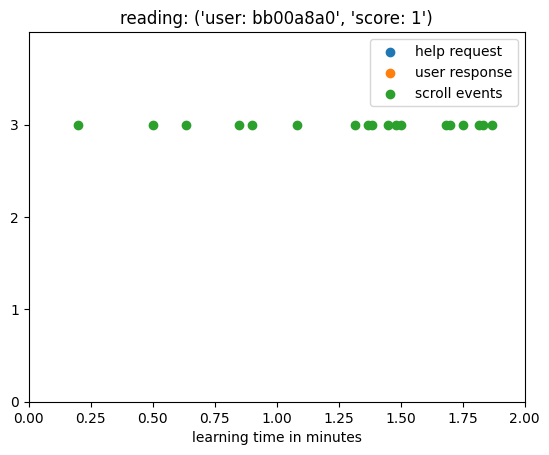

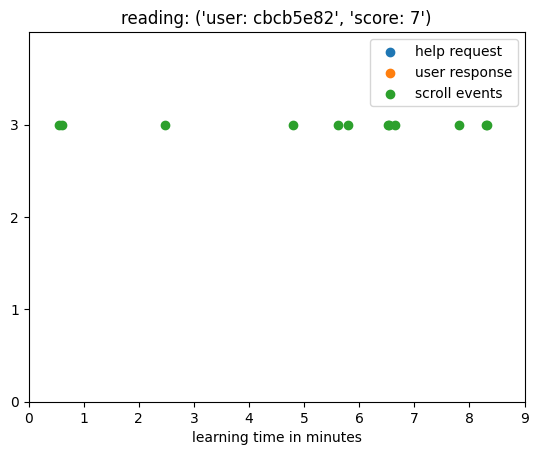

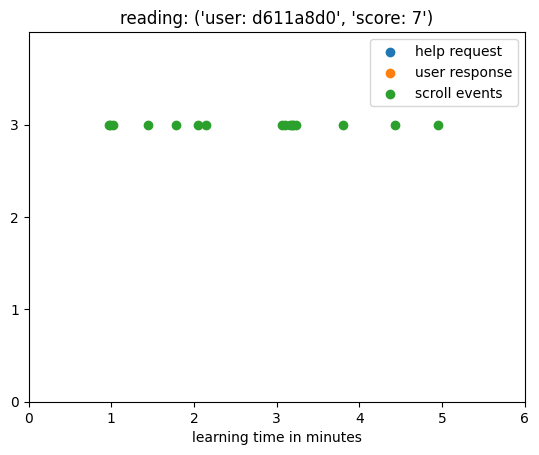

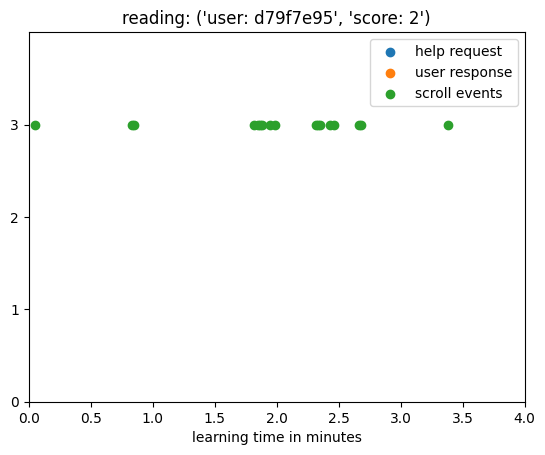

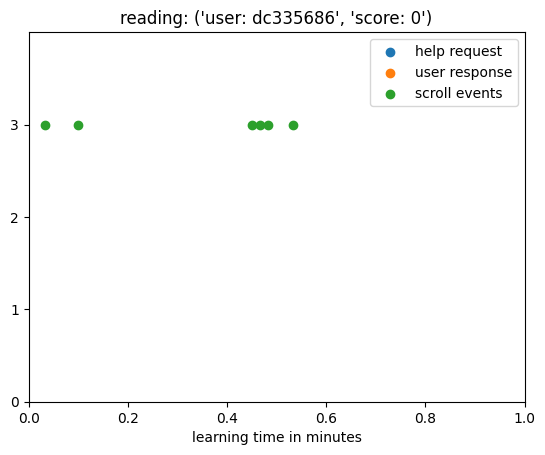

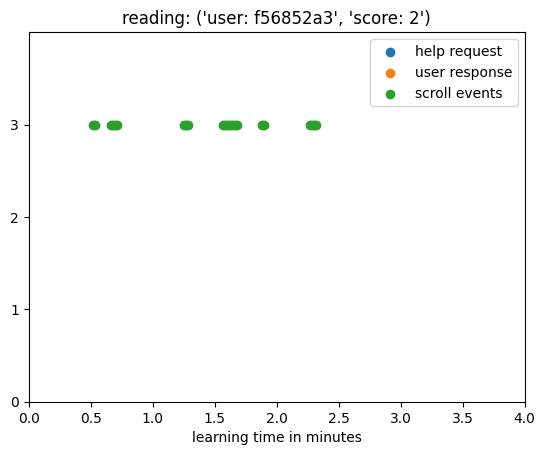





CONDITION: teacher-qa-bot


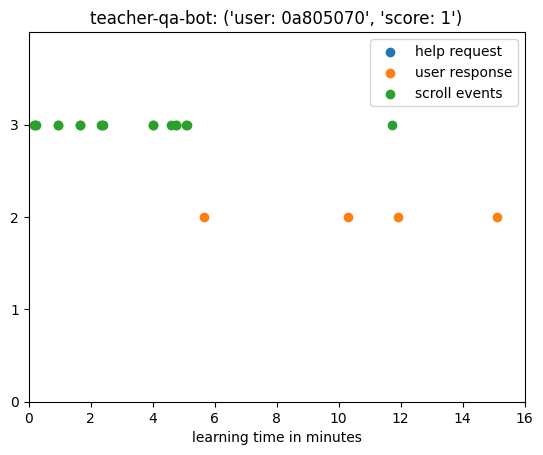

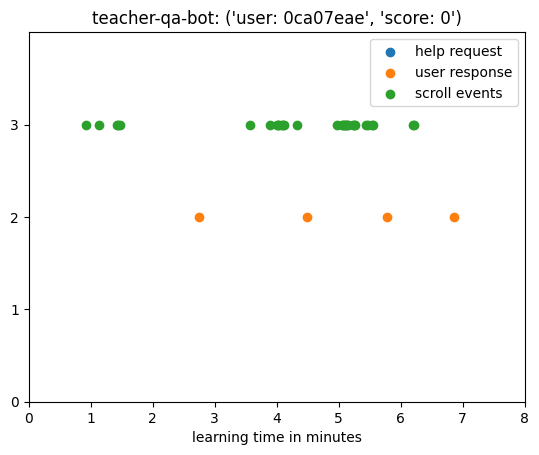

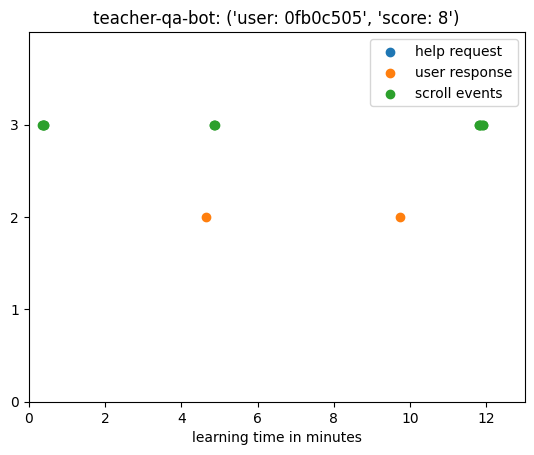

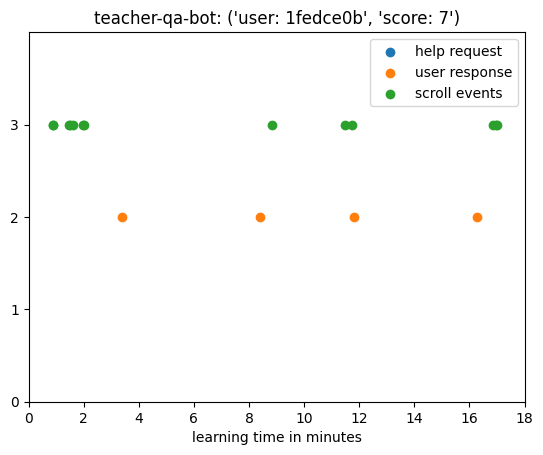

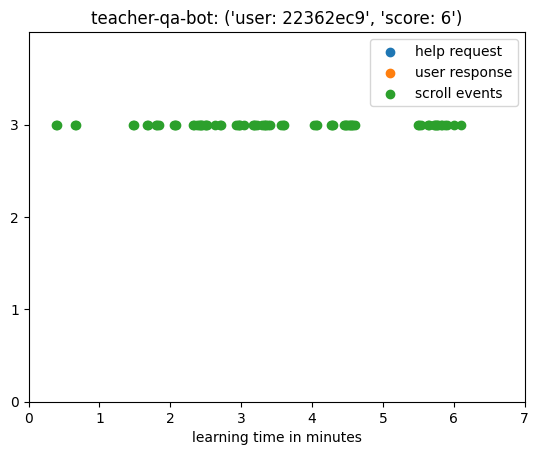

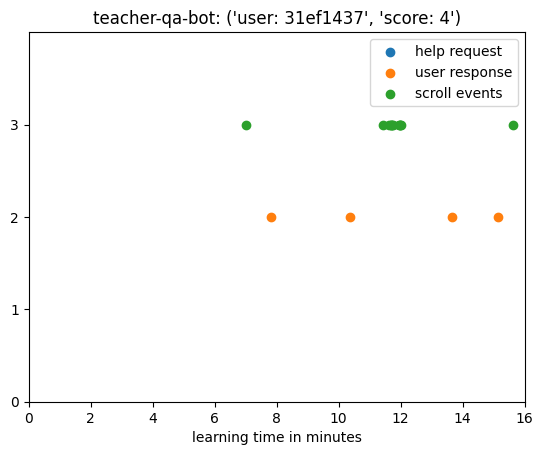

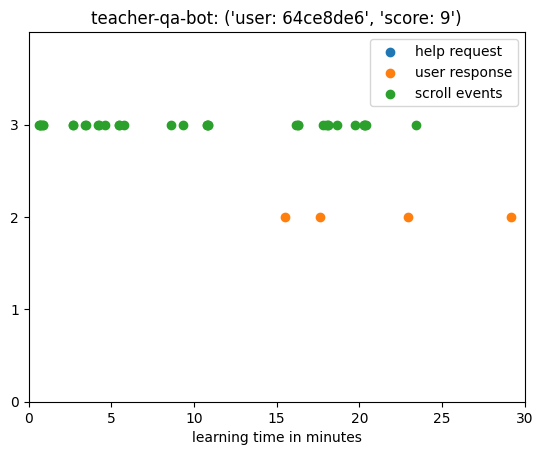

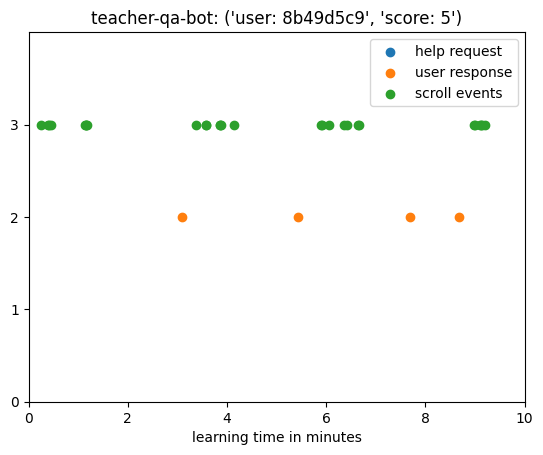

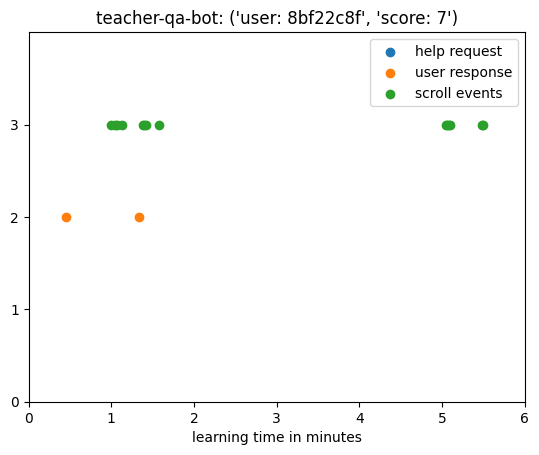

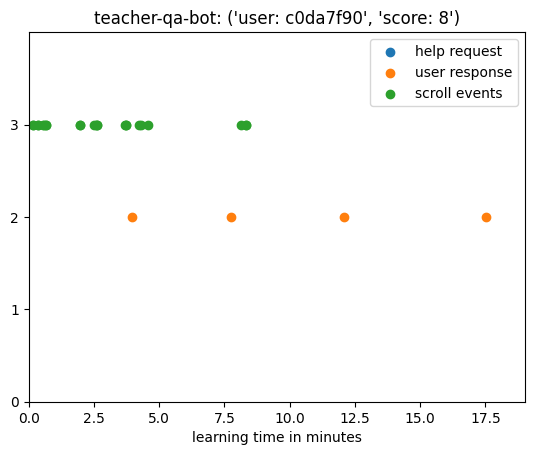

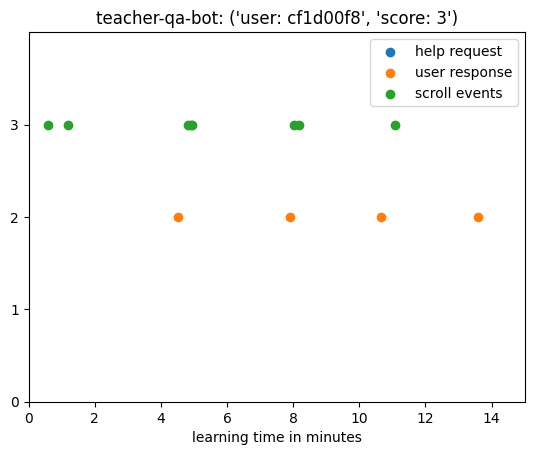

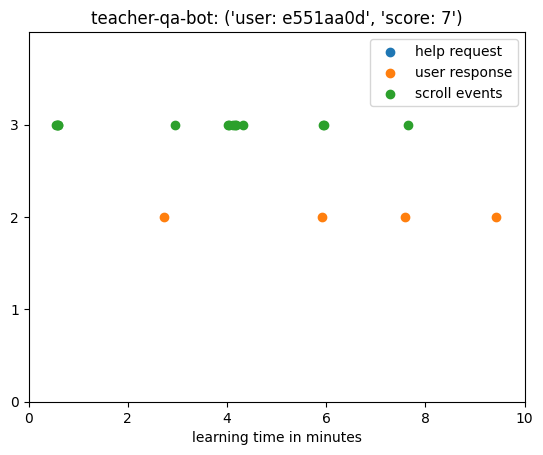

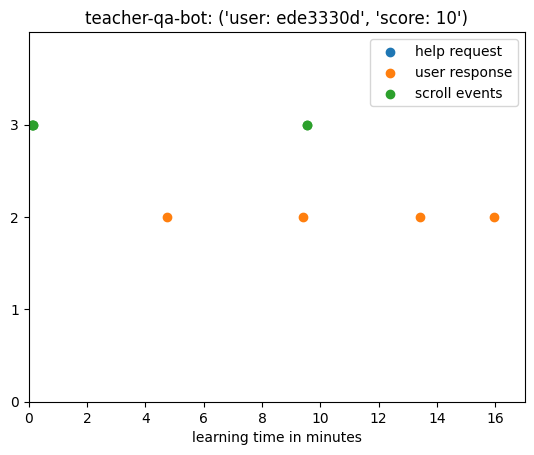





CONDITION: llm-qa-bot


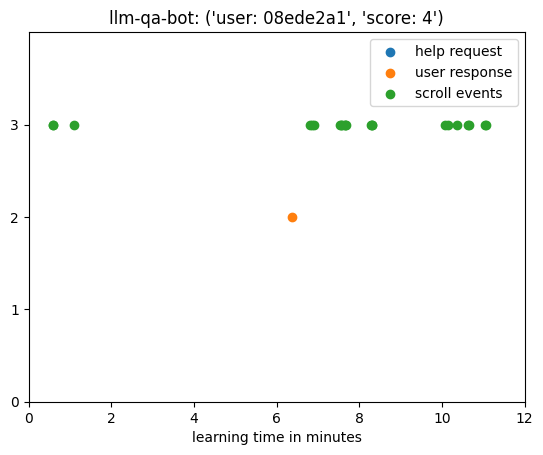

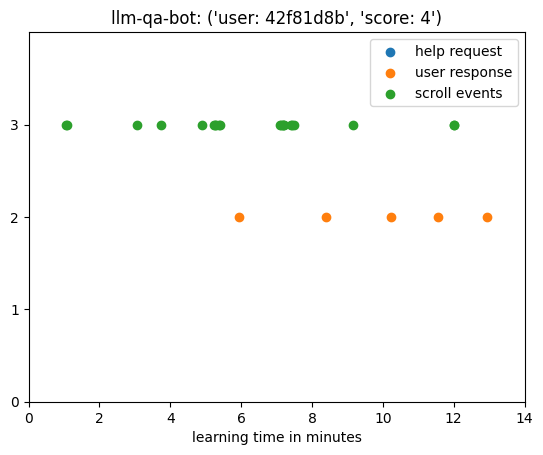

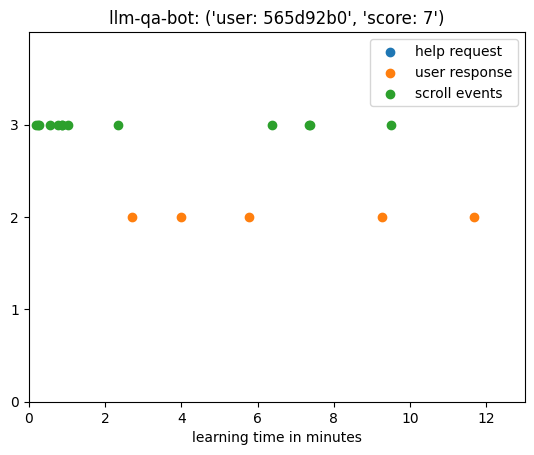

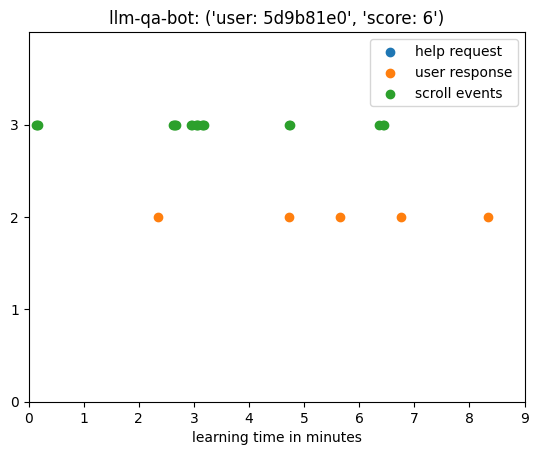

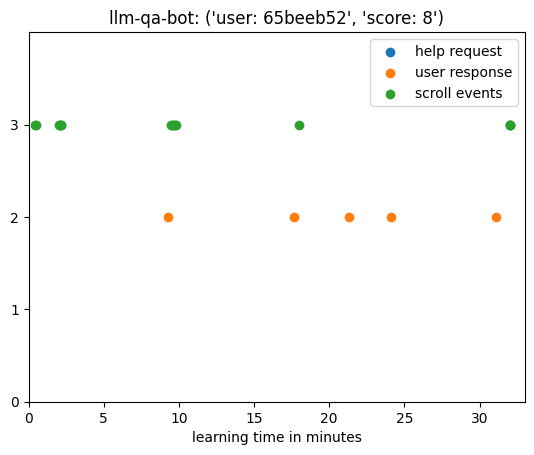

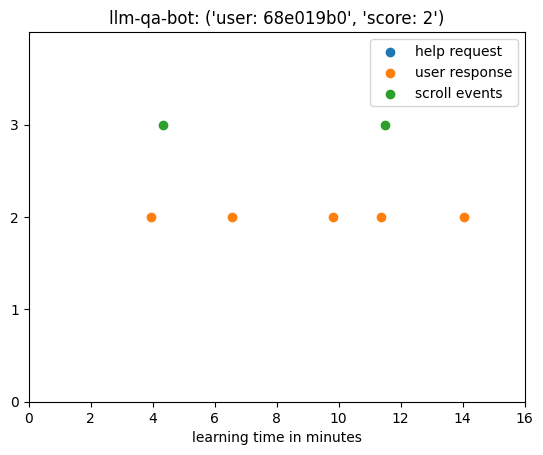

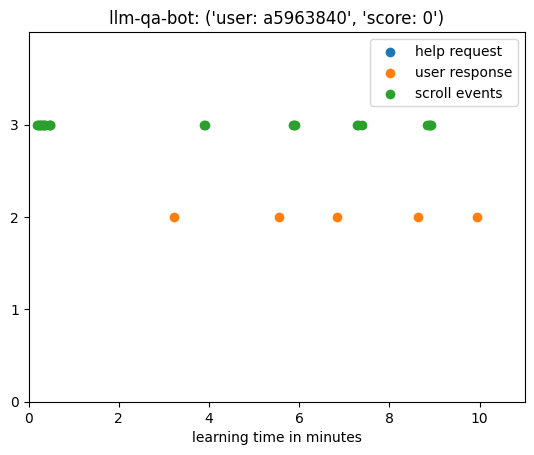

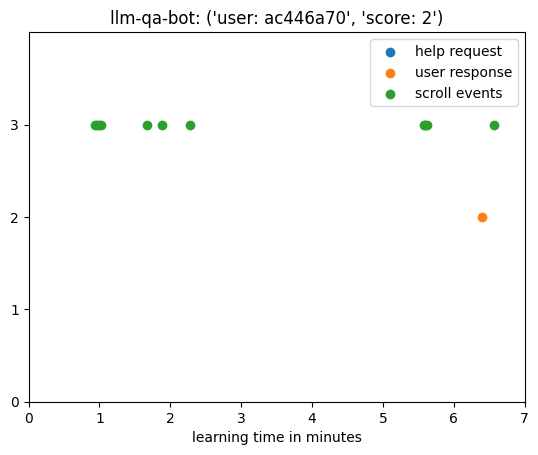

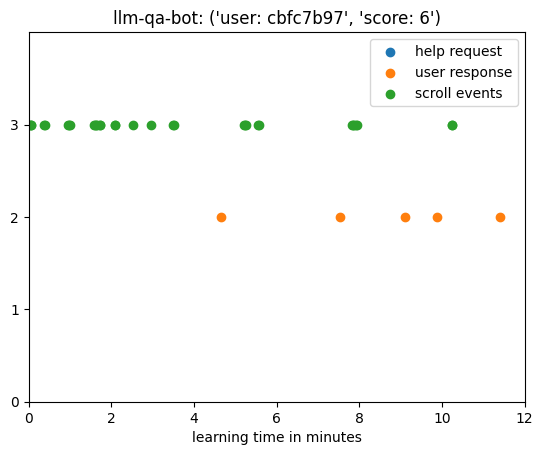

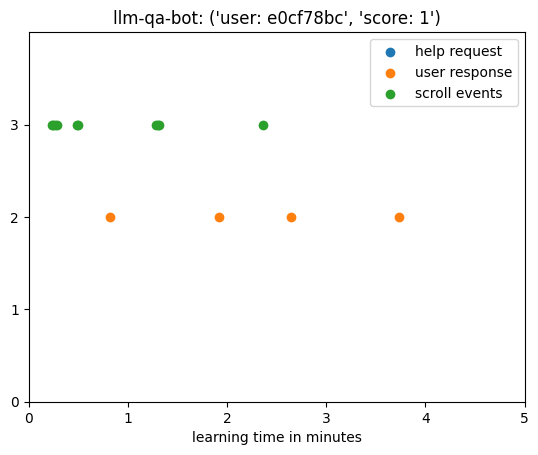





CONDITION: llm-chatbot


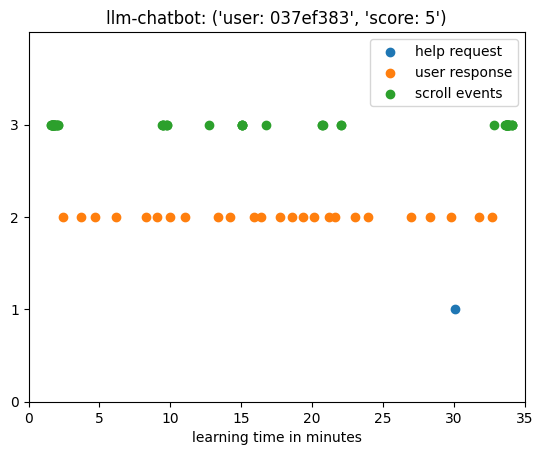

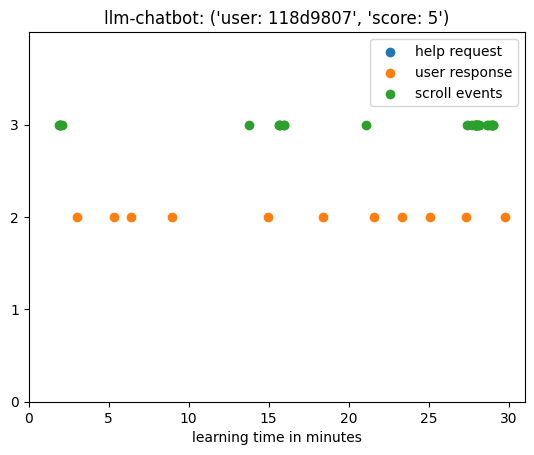

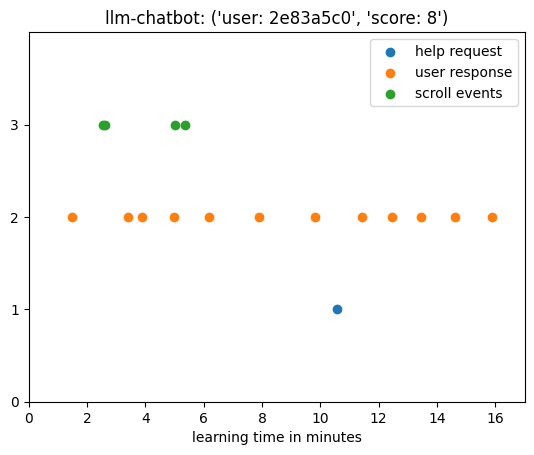

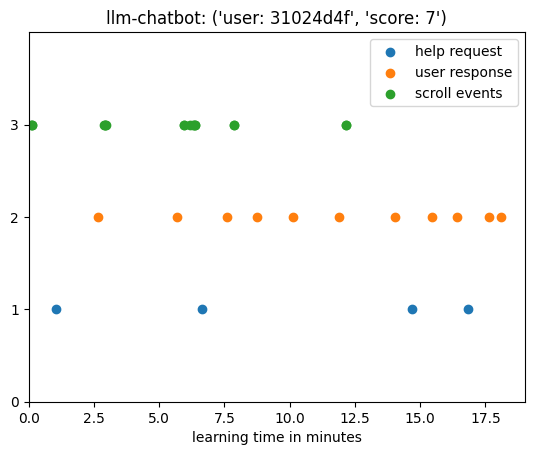

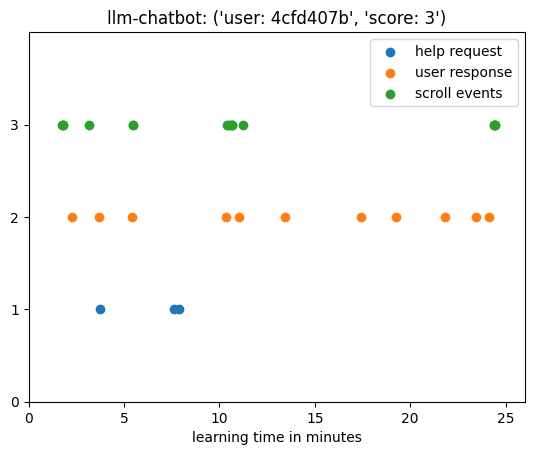

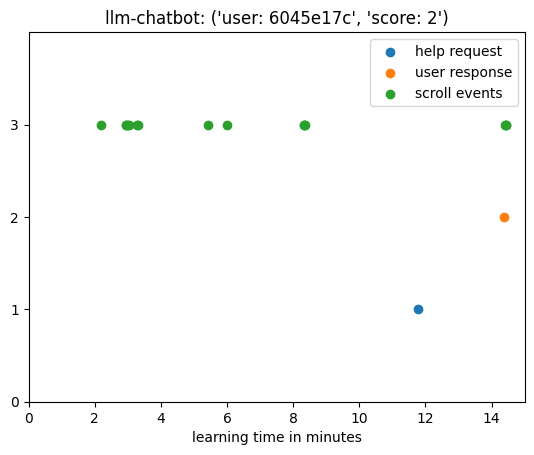

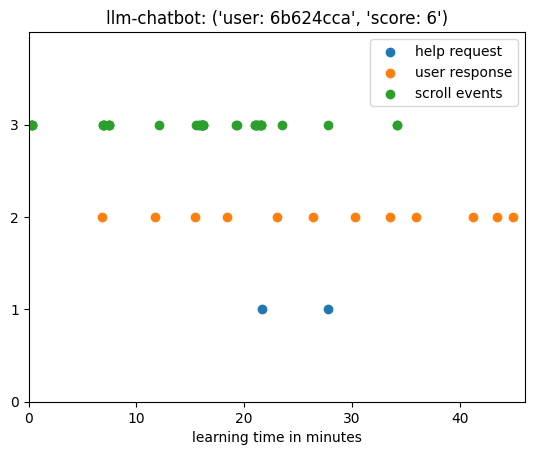

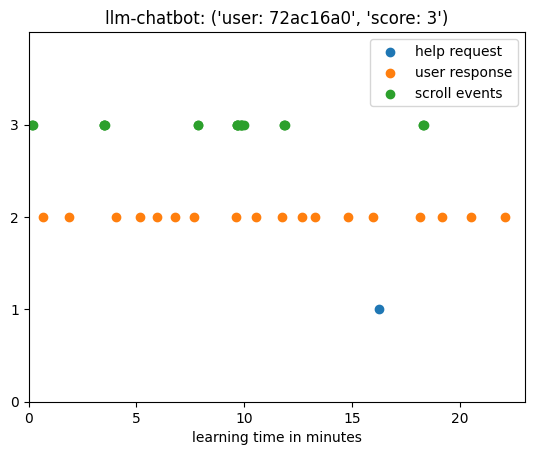

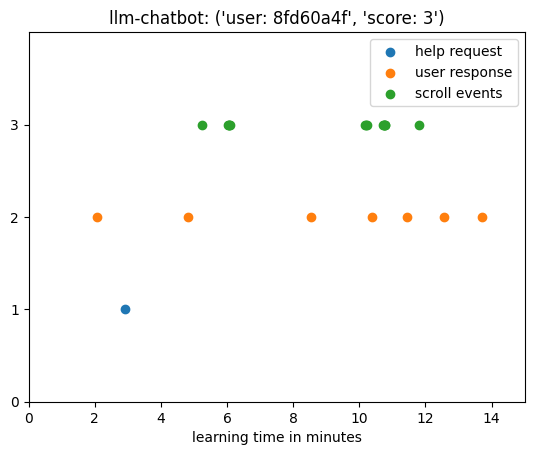

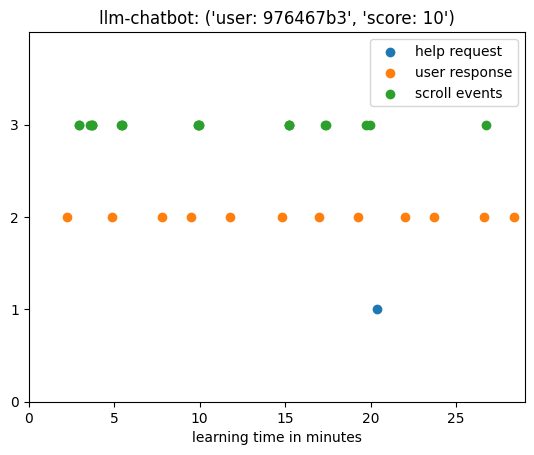

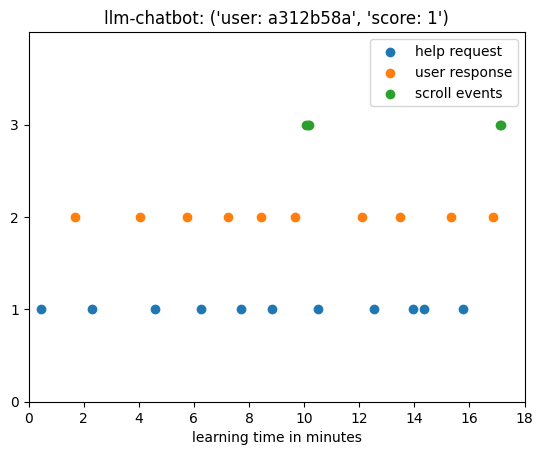

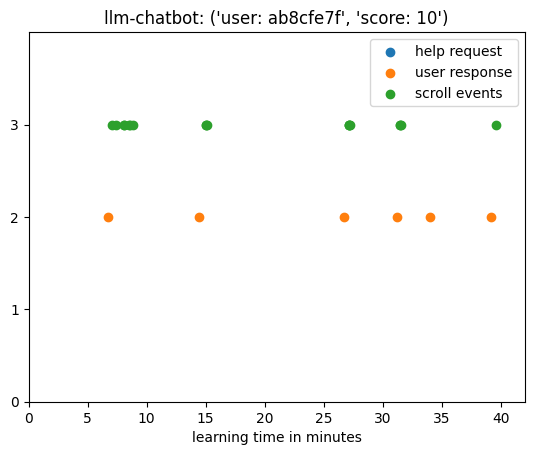

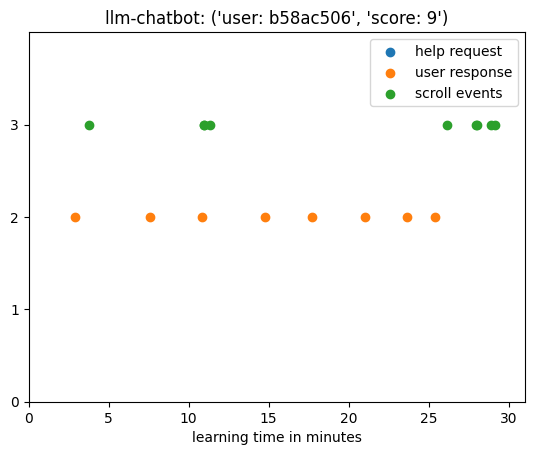

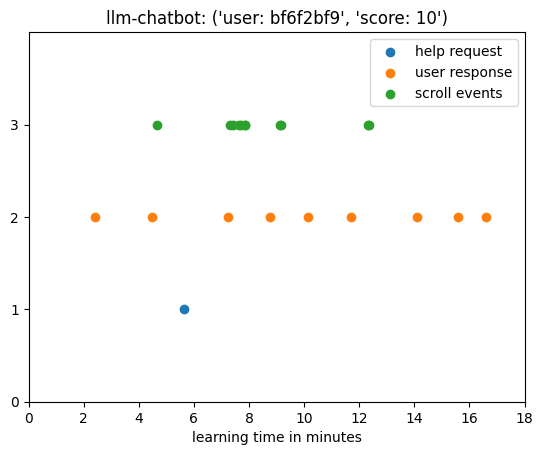

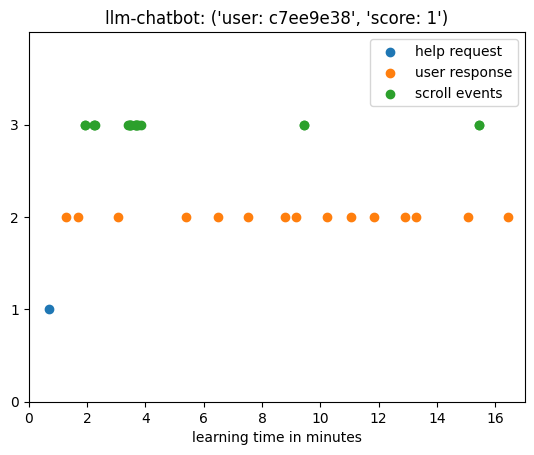

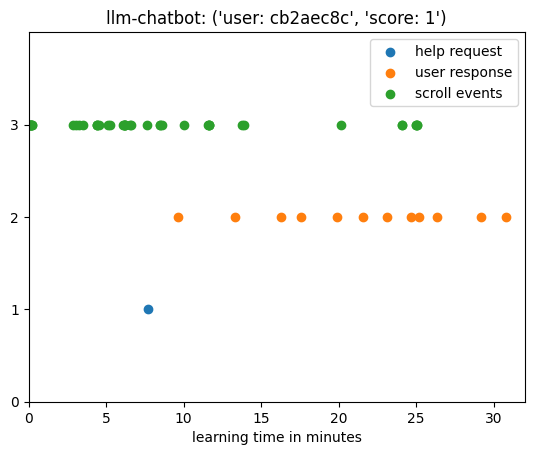

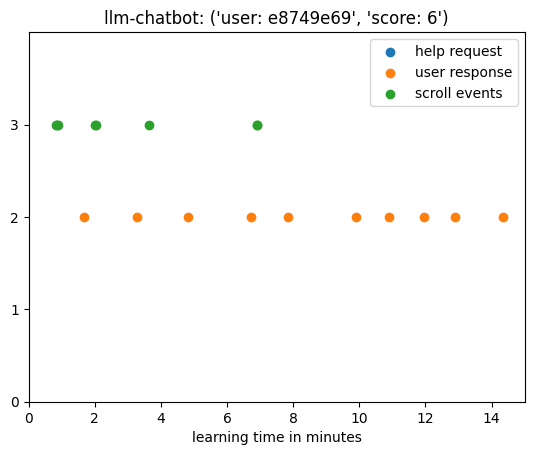

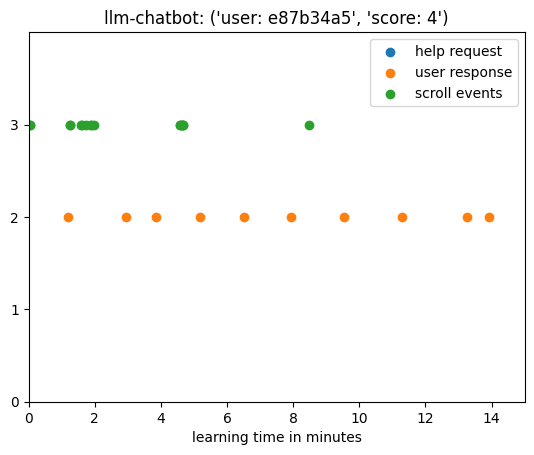

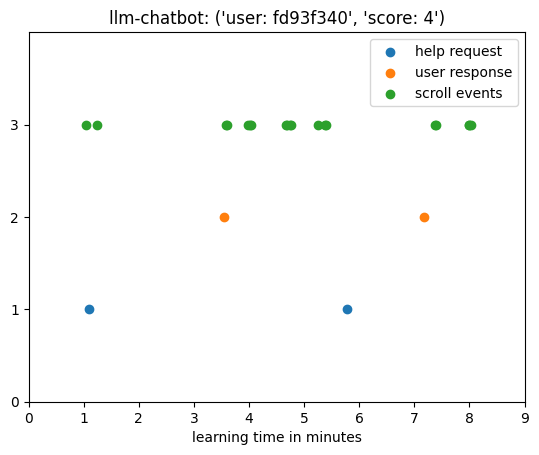

In [212]:
def create_interaction_plot(log):
    title = prepare_title(log)
    if not title:
        return
    learn_time = get_learn_time(log)
    max_time = int(learn_time + 0.999)
    scroll_times = get_scroll_times(log)
    chat_times = get_chat_times(log)

    # create plot
    plt.scatter(chat_times["help"], [1 for _ in chat_times["help"]], label="help request")
    plt.scatter(chat_times["user"], [2 for _ in chat_times["user"]], label="user response")
    plt.scatter(scroll_times, [3 for _ in scroll_times], label="scroll events")
    plt.xlim(0, max_time)
    plt.ylim(0, 4)
    plt.yticks([0, 1, 2, 3])
    plt.xlabel("learning time in minutes")
    plt.title(title)
    plt.legend()
    plt.show()


for c in CONDITIONS:
    print("CONDITION:", c)
    group = [l for l in logs if l["condition"] == c]
    for l in group:
        create_interaction_plot(l)
    print("\n\n\n")

In [213]:
# what do we want to indicate here?
# -- Time between enter/exit lesson section
# -- Plot multiple timelines in parallel
# -- Print chat actions
# -- Print scroll actions
# -- Print lesson model actions
# -- In title print uuid and final scores
# -- print also for reading condition

# -- set x-lim to enable a clean cut

# ----> INSERT LOGS FOR DIFFERENT CONDITIONS INTO THE DOCUMENT
# ----> WRITE SOME NOTES FOR MENG TO READ

# Relevant attributes
#   timestamps
#   lessonModalTimes
#   scrolllog
#   chatLog

In [214]:
# ANALYZE PASTING BEHAVIOR

In [215]:
for c in CONDITIONS:
    sub_df = copy_df[copy_df["condition"] == c]

In [216]:
for k in logs[0]:
    print(k)

chatLog
completedSurvey
condition
consent
demographicsAnswers
initializationTimes
isMobile
knowledgeAnswers
lessonModalTimes
localCreationTime
modalTimes
optOut
scrollLogs
state
surveyAnswers
surveyToken
tabSwitches
timestamps
userAgent
uuid


In [217]:
logs[0]["timestamps"]

{'completion': '9/10/2023, 10:39:24 PM',
 'creation': '9/10/2023, 9:50:04 PM',
 'enterDemographics': '9/10/2023, 10:38:22 PM',
 'enterKnowledge': '9/10/2023, 10:27:35 PM',
 'enterMain': '9/10/2023, 9:52:47 PM',
 'enterSurvey': '9/10/2023, 10:36:35 PM',
 'enterWelcome': '9/10/2023, 9:50:25 PM'}

In [218]:
# enterMain enterKnowledge 
# IN TITLE LIST 

## Old Code

In [219]:
file = "pilot_09_10_v4.json"
with open("./prolific_logs/" + file) as f:
    logs = json.load(f)
logs = [logs["logs"][l] for l in logs["logs"]]
# only consider completed sessions
logs = [l for l in logs if l["completedSurvey"] == True]
len(logs)

98

In [220]:
for c in CONDITIONS[1:]:
    group = [l for l in logs if l["condition"] == c]
    for l in group:
        print("'" + l["uuid"][:8] + "',")
        print(l["chatLog"]["current"]["main"][-2:][0]["text"])
        print(l["chatLog"]["current"]["main"][-2:][1]["text"])
        print("")

group = [l for l in logs if l["condition"] == "reading"]
for l in group:
    print(l["uuid"][:8])

'0a805070',
Peroxisomes carry out oxidation reactions that break down fatty acids and amino acids. They also detoxify many poisons that may enter the body. (Many of these oxidation reactions release hydrogen peroxide, H2O2, which would be damaging to cells; however, when these reactions are confined to peroxisomes, enzymes safely break down the H2O2 into oxygen and water.) For example, peroxisomes in liver cells detoxify alcohol. Their absence or reduction would lead to death of the organism.
Great job! You answered all the questions!

'0ca07eae',
Peroxisomes carry out oxidation reactions that break down fatty acids and amino acids. They also detoxify many poisons that may enter the body. (Many of these oxidation reactions release hydrogen peroxide, H2O2, which would be damaging to cells; however, when these reactions are confined to peroxisomes, enzymes safely break down the H2O2 into oxygen and water.) For example, peroxisomes in liver cells detoxify alcohol. Their absence or reducti